In [37]:
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
df = pd.read_csv('20200124_ews_observations.csv') 

In [38]:
df.head()


,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        171736 non-null  int64  
 1   ObservationDate  171736 non-null  object 
 2   EwsProcedure     171736 non-null  object 
 3   EWS_Total        171736 non-null  int64  
 4   SBP              160949 non-null  float64
 5   SBP_Score        160949 non-null  float64
 6   LOC              171736 non-null  object 
 7   LOC_Score        171736 non-null  int64  
 8   SpO2             171734 non-null  float64
 9   SpO2_Score       171734 non-null  float64
 10  Add_O2           171734 non-null  object 
 11  Add_O2_Score     171734 non-null  float64
 12  HR               171736 non-null  int64  
 13  HR_Score         171736 non-null  int64  
 14  RR               171736 non-null  int64  
 15  RR_Score         171736 non-null  int64  
 16  TEMP             171736 non-null  floa

In [40]:
df.isnull().sum()
#pd.set_option('display.max_rows', None)
#df.LOC.unique

PatientId              0
ObservationDate        0
EwsProcedure           0
EWS_Total              0
SBP                10787
SBP_Score          10787
LOC                    0
LOC_Score              0
SpO2                   2
SpO2_Score             2
Add_O2                 2
Add_O2_Score           2
HR                     0
HR_Score               0
RR                     0
RR_Score               0
TEMP                   0
TEMP_Score             0
dtype: int64

In [60]:
total_patients=df["PatientId"].value_counts()
total_patients
# total_patients.shape
#print(patient_value_counts)

1743    643
5797    441
1261    441
630     356
1841    351
       ... 
7700      1
1360      1
5781      1
976       1
2047      1
Name: PatientId, Length: 10136, dtype: int64

In [53]:
df_selected_feat = df[['PatientId','EWS_Total','SBP','LOC','SpO2','Add_O2','HR','RR','TEMP']]
df_selected_feat

,PatientId,EWS_Total,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
0,29,0,143.0,ALERT,96.0,False,80,18,36.6
1,30,3,NaN,ALERT,94.0,False,83,16,36.5
2,31,1,117.0,ALERT,95.0,False,75,14,37.3
3,32,0,NaN,ALERT,98.0,False,85,19,37.2
4,33,0,135.0,ALERT,97.0,False,89,14,36.1
...,...,...,...,...,...,...,...,...,...
171731,20278,3,88.0,ALERT,100.0,False,72,14,36.1
171732,20480,3,83.0,ALERT,92.0,False,79,18,36.8
171733,2499,0,118.0,ALERT,98.0,False,82,20,36.2
171734,20527,0,129.0,ALERT,98.0,False,70,16,36.5


In [57]:
patient1 = df_selected_feat.loc[df["PatientId"]== 1743]
patient1.describe()

,PatientId,EWS_Total,SBP,SpO2,HR,RR,TEMP
count,643.0,643.000000,616.000000,643.000000,643.000000,643.000000,643.000000
mean,1743.0,4.287714,105.775974,90.847589,101.418351,18.135303,36.726594
std,0.0,1.511005,10.803423,2.723803,7.797921,1.926706,0.388534
min,1743.0,1.000000,79.000000,72.000000,83.000000,13.000000,35.500000
25%,1743.0,3.000000,98.000000,89.000000,96.000000,17.000000,36.500000
50%,1743.0,4.000000,105.000000,91.000000,101.000000,18.000000,36.700000
75%,1743.0,5.000000,113.000000,93.000000,107.000000,19.000000,37.000000
max,1743.0,11.000000,178.000000,100.000000,156.000000,32.000000,38.600000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153C383E550>,
      dtype=object)

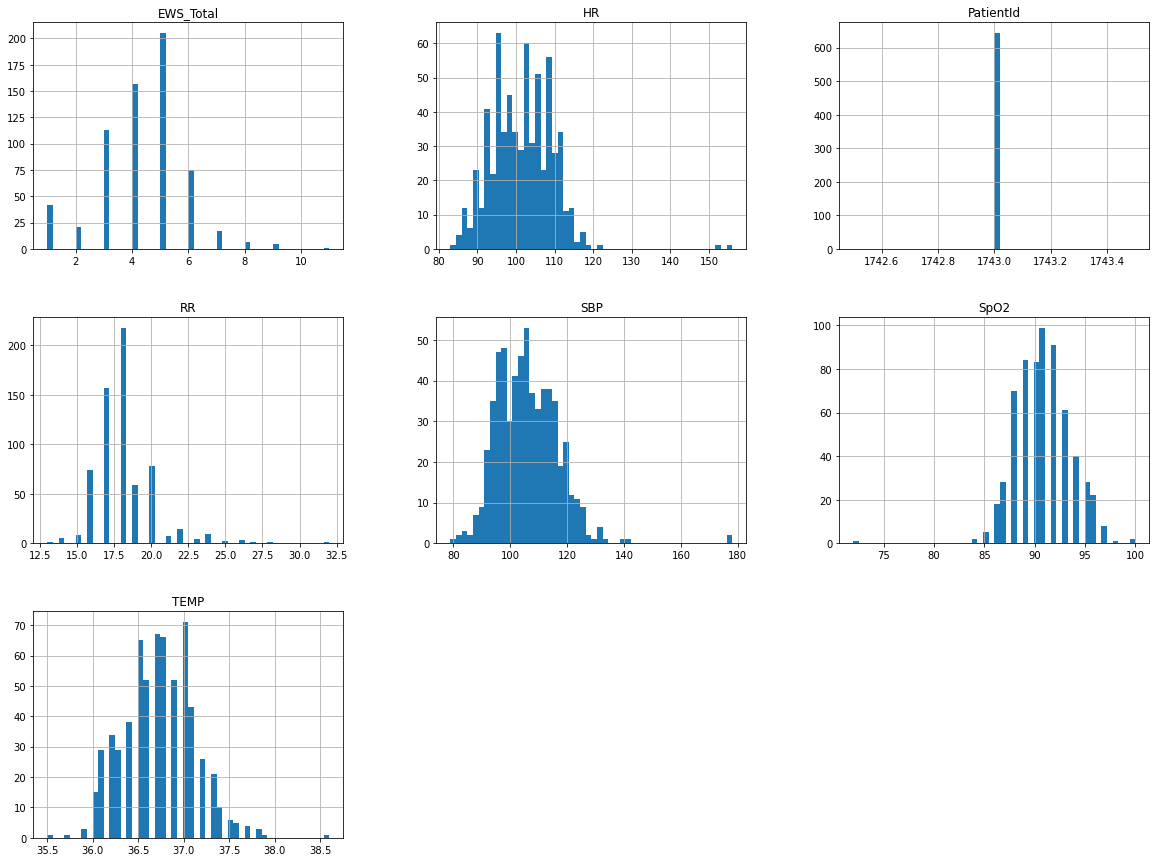

In [51]:
patient1.hist(bins=50, figsize=(20,15))

In [49]:
patient1.corr()


,PatientId,EWS_Total,SBP,SpO2,HR,RR,TEMP
PatientId,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EWS_Total,NaN,1.000000,-0.483845,-0.204296,0.020570,0.166915,-0.221065
SBP,NaN,-0.483845,1.000000,0.101704,0.252820,0.136941,0.178011
SpO2,NaN,-0.204296,0.101704,1.000000,-0.031094,0.071311,0.152933
HR,NaN,0.020570,0.252820,-0.031094,1.000000,0.100005,0.302579
RR,NaN,0.166915,0.136941,0.071311,0.100005,1.000000,0.071758
TEMP,NaN,-0.221065,0.178011,0.152933,0.302579,0.071758,1.000000


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


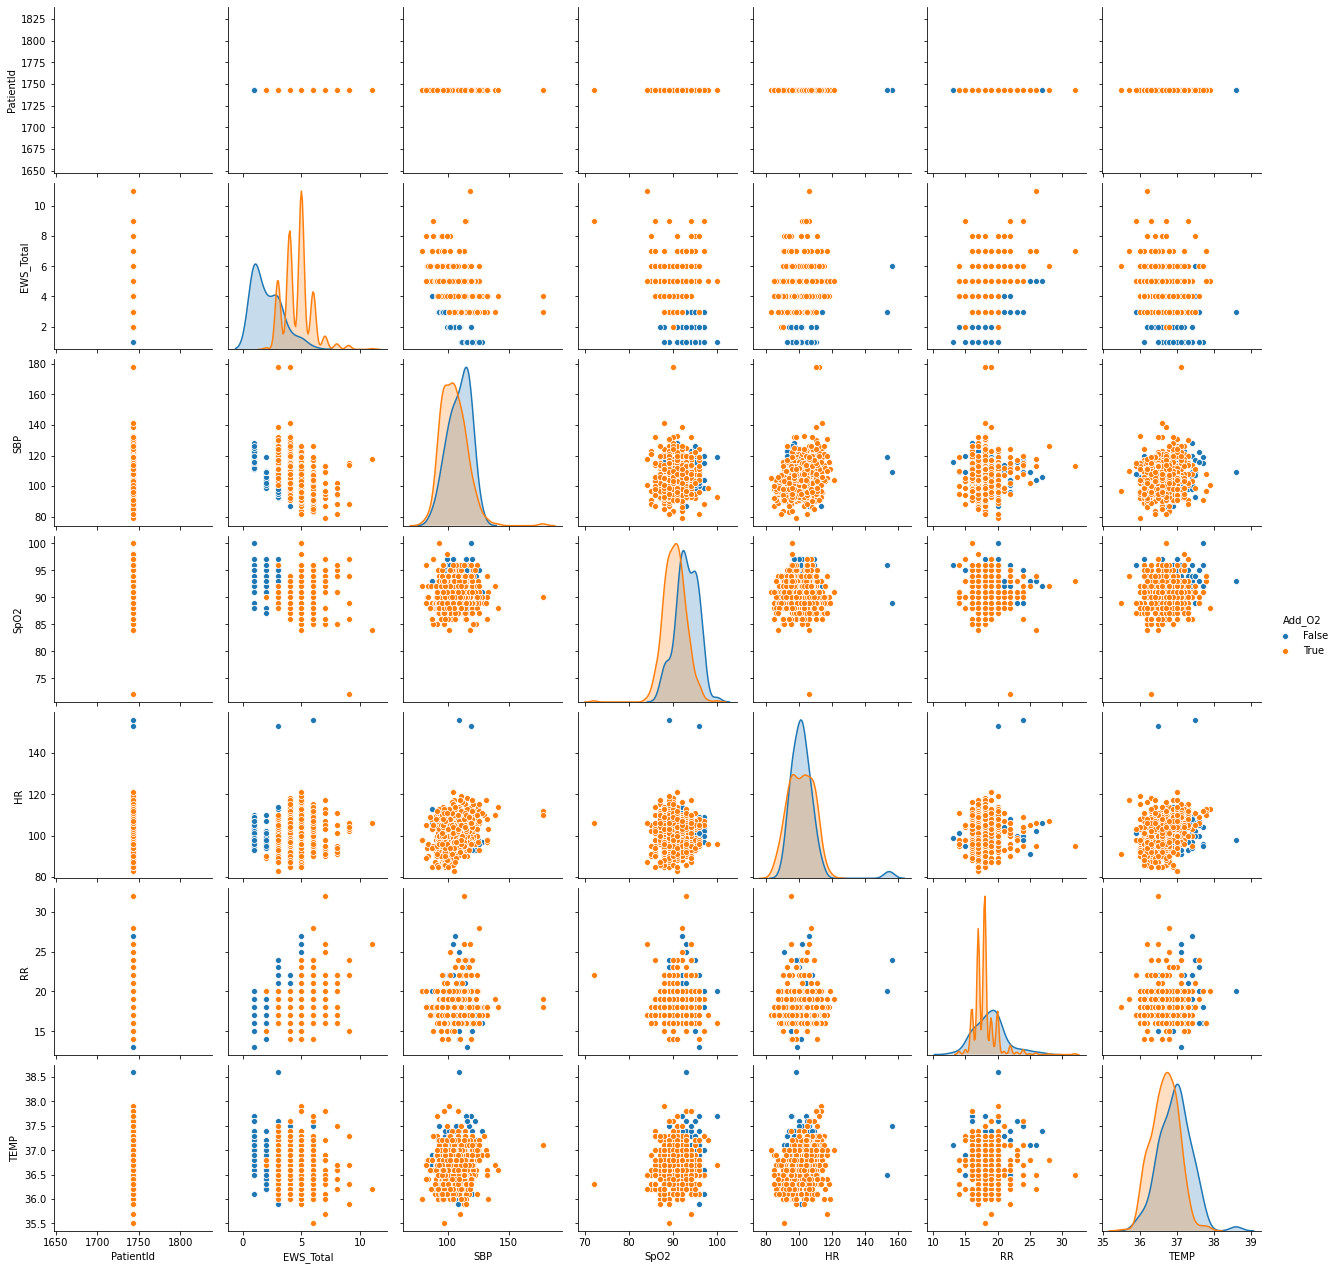

In [72]:
import seaborn as sns
#sns.pairplot(patient1.drop(['Add_O2'], axis=1))
sns.pairplot(patient1, hue='Add_O2')

In [24]:
normal_SBP=total_patients.loc[(df['SBP']>=90) & (df['SBP']< 120)]

In [25]:
normal_SBP.shape

(4245,)

In [26]:
normal_SBP=df.loc[(df['SBP']>=90) & (df['SBP']< 120)]
normal_SBP.shape

(78819, 18)